<center><b>Ecole Polytechnique, Cycle Ingénieur (2A)<b></center>
<center>APM_41M01_EP - Problem solving en mathématiques appliquées</center>
<center>Enseignants : Ludovic Goudenège <a href="mailto:ludovic.goudenege@polytechnique.edu">(mail)</a> 
    Teddy Pichard	<a href="mailto:teddy.pichard@polytechnique.edu">(mail)</a>
        </center>


In [7]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [8]:
# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
import random
%matplotlib inline  

<a id="Prelim"></a>
# Aléatoire 1 : Apprentissage par renforcement

## Table des matières

- [1. Le problème du bandit](#bandit)
- [2. Apprentissage markovien : Pierre-Feuilles-Ciseaux](#PFC)
   * [L'algorithme d'apprentissage](#Apprentissage)
   * [1 joueur apprend](#Apprend_iid)
   * [2 joueurs apprennent](#Apprend_apprend)

L'objectif de ce TP est d'étudier de façon expérimentale deux problèmes simples qui se traitent naturellement par <i>Apprentissage par renforcement</i>. 

<a id="bandit"></a>
# 1. Le problème du bandit

Considérons le problème suivant : un annonceur a le choix d'afficher sur une page web une publicité choisie parmi $\{A,B\}$, l'annonceur est payé au clic et l'objectif est d'afficher la publicité la plus attractive.

On modélise le problème de la façon suivante : chaque utilisateur se comporte de façon indépendante des autres et clique sur la publicité $A$ (resp. $B$) avec probabilité $p_A$ (resp. $p_B$), on suppose que $p_A,p_B$ sont inconnues.

On note $E_i\in \{A,B\}$ la publicité affichée sur le site lorsque le $i$-ème client se connecte.
On pose $X_i=1$ si le $i$-ème client clique, $0$ sinon. On a donc
$$
X_i\sim \mathrm{Bernoulli}(p_{E_i}).
$$
La stratégie $E_i$ à l'instant $i$ est une fonction (éventuellement aléatoire) de $(E_1,X_1),\dots,(E_{i-1},X_{i-1})$.
On cherche à définir une stratégie efficace pour l'annonceur, c'est-à-dire qu'asymptotiquement on propose la meilleure publicité :
$$
\frac{X_1+\dots +X_n}{n} \stackrel{n\to +\infty}{\to} \max\{p_A,p_B\}
$$
(convergence presque-sûre ou en probabilité). Encore mieux : on souhaite maximiser les gains moyens à horizon fini
$$
\max_{(E_i)_i\text{ stratégies }}\mathbb{E}[X_1+\dots +X_n].
$$



### Une méthode sous-optimale : la $\varepsilon$-exploration
Considérons la stratégie suivante :
- On fixe un paramètre $\varepsilon>0$ "petit".
- On choisit $E_1=A,E_2=B$.
- Pour $i\geq 3$, on note $M_i$ la publicité qui a eu le meilleur "taux de clic" jusque-là (en cas d'ex-aequo entre $A,B$ on se donne une règle arbitraire)
   * Avec proba $1-\varepsilon$, on prend $E_i=M_i$,
   * Avec proba $\varepsilon$ on prend $E_i=\mathrm{non}(M_i)$.

<i>(<b>Vocabulaire :</b> On considère qu'avec probabilité $\varepsilon$ on "explore", alors qu'avec probabilité $1-\varepsilon$ on "exploite".)</i>



<div markdown=1 class="DoIt"> 

1. Intuitivement, quelle est la limite de $(X_1+\dots +X_n)/n$ ? Asymptotiquement (en $n$), quel semble être le meilleur choix pour $\varepsilon$?
2. On fixe $n=5000$, $p_A=0.4$, $p_B=0.6$, $\varepsilon=0.001$. Tracer 10 trajectoires du processus
$$
i\in \{1,\dots,n\} \mapsto \frac{1}{i}\left( X_1+\dots +X_i\right).
$$
Est-ce que les courbes sont compatibles avec votre intuition de la question précédente?
3. Pour $n=100$,  $p_A=0.4$, $p_B=0.6$, déterminer par simulation la valeur de $\varepsilon$ qui optimise $\mathbb{E}\left[X_1+\dots +X_n\right]$. (Prendre $10000$ simulations pour chaque valeur de $\varepsilon$.)

<div markdown=1 class="Answers"> 

1. Intuitivement, la limite de $(X_1+\dots +X_n)/n$ sera :
   - $\max(p_A,p_B)$ avec une probabilité de $(1-\varepsilon)$
   - $\min(p_A,p_B)$ avec une probabilité de $\varepsilon$


Text(0.5, 1.0, 'Simulation de 10 trajectoires pour epsilon = 0.001, pA = 0.4, pB = 0.6')

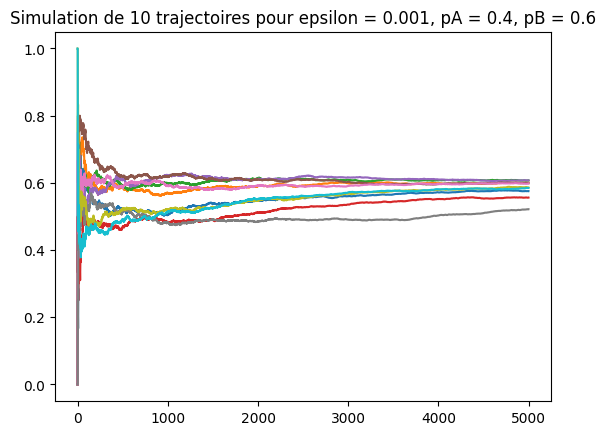

In [9]:
# Question 2
N, S = 5000, 10
p = [0.4, 0.6]  # [pA, pB]
eps = 0.001

bernouilli = lambda p : np.random.rand() < p

def simul(probas, N, eps):
    "On simule ici une trajectoire"
    X = np.zeros(N)
    X[0] = bernouilli(probas[0])
    X[1] = bernouilli(probas[1])

    plays = np.ones(2, dtype=int)
    wins = np.array([X[0], X[1]])
    
    for i in range(2, N):
        rates = wins / plays
        if np.isclose(rates[0], rates[1]):
            M = bernouilli(0.5) # on se donne une règle quelconque en cas d'égalité des taux
        else:
            M = np.argmax(rates)

        E = 1 - M if bernouilli(eps) else M
        X[i] = bernouilli(probas[E])
        
        plays[E] += 1
        wins[E] += X[i]
    
    return X

for i in range(S):
    X = simul(p, N, eps)
    X_bar = np.cumsum(X) / np.arange(1, N+1)

    plt.plot(X_bar, label=f'Trajectoire {i+1}')

plt.title(f"Simulation de {S} trajectoires pour epsilon = {eps}, pA = {p[0]}, pB = {p[1]}")
# plt.legend()

On constate que notre intuition est confirmée.

Pour eps = 0.05, gain = 581.7, k=0
Pour eps = 0.065, gain = 579.62, k=1
Pour eps = 0.08, gain = 580.97, k=2
Pour eps = 0.095, gain = 577.12, k=3
Pour eps = 0.11, gain = 575.79, k=4
Pour eps = 0.125, gain = 572.14, k=5
Pour eps = 0.14, gain = 569.75, k=6
Pour eps = 0.155, gain = 564.49, k=7
Pour eps = 0.16999999999999998, gain = 561.99, k=8
Pour eps = 0.185, gain = 563.01, k=9
Pour eps = 0.2, gain = 556.21, k=10
[0.05  0.065 0.08  0.095 0.11  0.125 0.14  0.155 0.17  0.185 0.2  ]


Text(0.5, 1.0, 'Evolution du gain en fonction de epsilon')

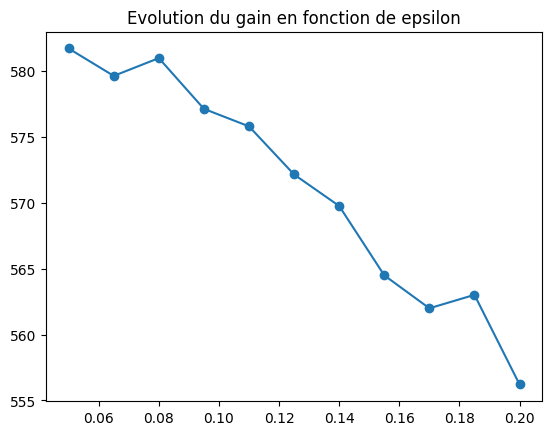

In [10]:
# Question 3 : 
p=[0.4, 0.6] # [pA, pB]
pA=p[0]
pB=p[1]
S=100 # Nombre de simulations
N=1000 # Durée d'une 
ValeursEpsilon=np.arange(0.05,0.20,0.015)
reward_eps=np.empty_like(ValeursEpsilon)

for k, eps in enumerate(ValeursEpsilon):
    sum = 0

    for i in range(S):
        X = simul(p, N, eps)
        sum += X.sum()

    reward_eps[k] = sum / S
    print(f"Pour eps = {eps}, gain = {reward_eps[k]}, k={k}")

print(ValeursEpsilon)

plt.plot(ValeursEpsilon, reward_eps)
plt.scatter(ValeursEpsilon, reward_eps)
plt.title("Evolution du gain en fonction de epsilon")

On constate que le gain est plus élevé quand $\epsilon$ décroit ; mais pas trop, pour avoir quand même encore des possibilités d'exploration si on n'est pas tombé au départ sur la publicité préférée.

## Une stratégie asymptotiquement optimale?

On fait maintenant varier la probabilité d'exploration. L'algorithme est le même que précédemment sauf qu'on remplace $\varepsilon$ par une suite
 $(\varepsilon_i)_{i\geq 3}$ d'éléments de $(0,1)$. On pourra essayer
-  $\varepsilon_i=1/i^2$
-  $\varepsilon_i=1/\sqrt{i}$
-  $\varepsilon_i=1/\log{i}$

<div markdown=1 class="DoIt"> 

Q1. On fixe à nouveau $n=1000$, $p_A=0.4$, $p_B=0.6$. Pour les exemples des 3 suites ci-dessus, tracer quelques trajectoires de courbes
$$
i\in \{1,\dots,n\} \mapsto \frac{1}{i}\left( X_1+\dots +X_i\right).
$$ 

Text(0.5, 1.0, 'Simulation de 30 trajectoires pour pA = 0.6, pB = 0.4')

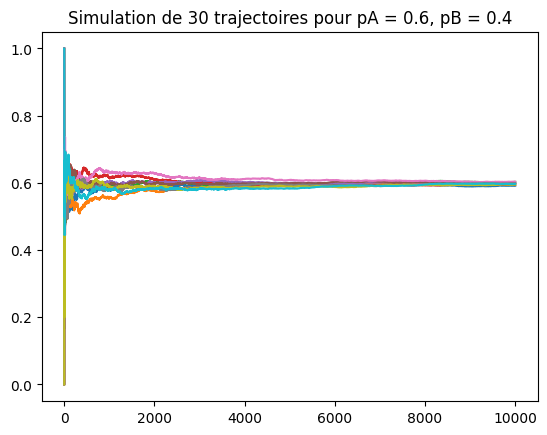

In [11]:
####################################
# Question 1

p=[0.6, 0.4]
pA=p[0]
pB=p[1]
S=30 # Nombre de simulations
N=10000 # Durée d'une simulation
eps0 = lambda _ : 0.001
eps1 = lambda i : 1 / i ** 2
eps2 = lambda i : 1 / np.sqrt(i)
eps3 = lambda i : 1 / np.log(i)
eps = eps2

def simul_var(probas, N, eps):
    "On simule ici une trajectoire ; ici eps est une fonction"
    X = np.zeros(N)
    X[0] = bernouilli(probas[0])
    X[1] = bernouilli(probas[1])

    plays = np.ones(2, dtype=int)
    wins = np.array([X[0], X[1]])
    
    for i in range(2, N):
        rates = wins / plays

        if np.isclose(rates[0], rates[1]):
            M = bernouilli(0.5)
        else:
            M = np.argmax(rates)

        E = 1 - M if bernouilli(eps(i)) else M
        X[i] = bernouilli(probas[E])
        
        plays[E] += 1
        wins[E] += X[i]
    
    return X

for i in range(10):
    X = simul_var(p, N, eps)
    X_bar = np.cumsum(X) / np.arange(1, N+1)

    plt.plot(X_bar, label=f'Trajectoire {i+1}')

plt.title(f"Simulation de {S} trajectoires pour pA = {p[0]}, pB = {p[1]}")

<div markdown=1 class="DoIt"> 

Q2. Que doit vérifier la suite $(\varepsilon_i)$ pour que l'on ait
$$
\frac{X_1+\dots +X_n}{n} \stackrel{n\to +\infty}{\to} \max\{p_A,p_B\}?
$$

<div markdown=1 class="Answers"> 

2. 

La suite $\varepsilon_i$ doit en effet tendre vers 0, c'est une condition necessaire pour que l'exploitation devienne la stratégie dominante à long terme.

Toutefois pour garantir une exploration suffisante, la somme des termes de la suite doit diverger.

**Justification** : Cette hypothèse est soutenue par nos observations : la suite $\varepsilon_i = 1/i^2$, qui décroît pourtant très vite, n'a pas mené à la convergence souhaitée car sa somme est finie. En revanche, avec les suites qui vérifient bien cette condition supplémentaire de divergence de la série associée, comme $\varepsilon_i = 1/\sqrt{i}$ et $\varepsilon_i = 1/\log(i)$, nous avons bien obtenu la convergence vers le gain maximal.



<a id="PFC"></a>
# 2. Apprentissage markovien : Pierre-Feuille-Ciseaux

## Préliminaires et notations

On considère $2$ joueurs $X,Y$ qui jouent à <i>Pierre-Feuille-Ciseaux</i>. Pour $t\geq 1$ on note $X_t\in \{\text{Pi,Fe,Ci}\}$ le choix du joueur à l'instant $t$ et $Y_t$ le choix de son adversaire.

On appelera `Historique` la liste 
$$
[[X_1,Y_1],[X_2,Y_2],\dots, [X_T,Y_T]]
$$
des choix des joueurs jusqu'à l'instant actuel.

Dans la présentation on représentera aussi `Historique` schématiquement de la façon suivante :
<img src="figures/ListeHistorique.jpg" style="width:450px;"/>
désigne également la liste
$$
[[\mathrm{Pi},\mathrm{Fe}],[\mathrm{Ci},\mathrm{Fe}],\dots, [\mathrm{Pi},\mathrm{Fe}]]
$$
avec $T=7$.


On suppose que l'adversaire fait ses choix suivant une mémoire "courte" et une source d'aléa :
* $Y_1,Y_2$ sont arbitraires.
* pour tout $t\geq 2$, 
$$
Y_{t+1}=\phi\left(X_{t-1},X_t,Y_{t-1},Y_t,A_{t+1}\right),
$$
où
  * $\phi$ est une fonction déterministe $\{\text{Pi,Fe,Ci}\}^4\times[0,1] \to \{\text{Pi,Fe,Ci}\}$
  * $(A_t)$ est une suite de variables i.i.d. uniformes dans $[0,1]$.

Par exemple, la stratégie (assez efficace...) consistant à toujours tirer uniformément au hasard (indépendamment des choix précédents) correspond à
$$
\phi(X_{t-1},X_t,Y_{t-1},Y_t,A_{t+1}) = \mathrm{Pi}\times \mathbf{1}_{A_{t+1}<1/3}
+ \mathrm{Fe}\times \mathbf{1}_{1/3<A_{t+1}21/3} + \mathrm{Ci}\times \mathbf{1}_{2/3 < A_{t+1}}.
$$
alors que la stratégie (idiote) consistant à jouer ce que l'adversaire vient de jouer est
$$
\phi(X_{t-1},X_t,Y_{t-1},Y_t,A_{t+1}) = X_t.
$$


### Réponse à une stratégie

On introduit donc une fonction $(p,q,r)\mapsto \verb|ReponseStrategie|(p,q,r)\in [0,1]^3$ de la façon suivante :
<br><br>
$$
\verb|ReponseStrategie|(p,q,r)=\mathrm{argmax}_{(x,y,z)} \mathbb{E}[\text{Gain pour }X \text{ si $X$ tire selon } (x,y,z)\text{ et }Y\text{ tire selon }(p,q,r)].
$$
<br>
<i>(Dans cette espérance on considère qu'une victoire vaut $1$ et une défaite $-1$.)</i><br><br>

<br>
Par exemple, vous pouvez vérifier que si $(p,q,r)=(0.01,0,0.99)$ alors cela signifie que $Y$ va jouer `Ci` presque à tous les coups et donc $X$ joue `Pi` : 
$$
\verb|ReponseStrategie|(0.01,0,0.99)=(1,0,0).
$$

<div markdown=1 class="DoIt"> 

Que vaut la fonction `ReponseStrategie()`? <i>(Indication : les calculs sont assez simples.)</i><br>
Implémenter la fonction `ReponseStrategie()`.

<div markdown=1 class="Answers"> 



In [12]:
def ReponseStrategie(p, q, r):
    """
    Détermine la meilleure réponse à la stratégie de l'adversaire.
    Retourne une distribution de probabilités (x, y, z) pour Pierre, Feuille, Ciseaux.
    """
    gains_pierre = r - q
    gains_feuille = p - r
    gains_ciseaux = q - p

    if gains_pierre == gains_feuille and gains_feuille == gains_ciseaux: # Adversaire imprévisible
        return (1/3, 1/3, 1/3)

    max_gain = max(gains_pierre, gains_feuille, gains_ciseaux)

    if max_gain == gains_pierre and max_gain == gains_feuille:
        return (0.5, 0.5, 0)
    elif max_gain == gains_pierre and max_gain == gains_ciseaux:
        return (0.5, 0, 0.5)
    elif max_gain == gains_feuille and max_gain == gains_ciseaux:
        return (0, 0.5, 0.5)
    elif max_gain == gains_pierre:
        return (1, 0, 0)
    elif max_gain == gains_feuille:
        return (0, 1, 0)
    else:
        return (0, 0, 1)
    
(p,q,r) = (0.01, 0, 0.99)
(p,q,r) = (0.45, 0.55, 0)
print(ReponseStrategie(p,q,r))

(0, 1, 0)


<center>
    <font size=+3 color='red'>!! La partie obligatoire (à rendre sur Moodle) s'arrête ici !!</font>
</center>

Pour commencer à coder une stratégie d'apprentissage on définit une fonction `Stats` qui en fonction d'un historique `Historique` donné et de `PasseRecent`=$[[X_{t-1},X_t],[Y_{t-1},Y_t]]$  renvoie le nombre de fois où le joueur $i$ ($i=0$ correspond au joueur $X$) a joué `'Pi'`, `'Fe'` ou `'Ci'`.

Par exemple, avec l'exemple précédent pour `Historique` et
```python
TestHistorique=[['Pi','Fe'],['Ci','Fe'],['Pi','Ci'],['Fe','Pi'],['Ci','Fe'],['Pi','Ci'],['Pi','Fe']]
TestPasse=[['Ci','Fe'],['Pi','Ci']]
```
on doit obtenir
```python
Stats(TestHistorique,TestPasse,1)
>[1, 1, 0]
```
car dans la situation de ce passé récent le joueur $1$ a joué $1$ fois `Pi` et une fois `Fe` :
<img src="figures/ListeHistorique_AvecPasseRecent.jpg" style="width:450px;"/>

<div markdown=1 class="DoIt"> 

Implémenter la fonction `Stats`.

In [13]:
def Stats(Historique, PasseRecent, joueur_id):
    stats = [0, 0, 0]
    
    for t in range(3, len(Historique)):
        pass_recent_historique = Historique[t-2:t]
        
        # On vérifie si ce passé correspond au PasseRecent de la question
        if pass_recent_historique == PasseRecent:
            
            # Coup joué aorès
            coup_joue = Historique[t][joueur_id]
            
            if coup_joue == 'Pi':
                stats[0] += 1
            elif coup_joue == 'Fe':
                stats[1] += 1
            elif coup_joue == 'Ci':
                stats[2] += 1
                
    return stats

TestHistorique=[['Pi','Fe'],['Ci','Fe'],['Pi','Ci'],['Fe','Pi'],['Ci','Fe'],['Pi','Ci'],['Pi','Fe']]
TestPasse=[['Ci','Fe'],['Pi','Ci']]
Stats(TestHistorique,TestPasse,1)

[1, 1, 0]

<a id="Apprentissage"></a>

## L'algorithme d'apprentissage

On considère la stratégie suivante. Pour un paramètre $\varepsilon >0$ (petit),
* Si $t=1,2,3$ on tire au hasard uniformément entre Pi,Fe,Ci.
* Pour $t\geq 4$
    -  <b>avec probabilité $1-\varepsilon$ on "exploite"</b> : on renvoie $\verb|ReponseStrategie|(p,q,r)$ calculée sur les stats de $Y$ dans l'historique. Plus précisément
          * En notant $(X_{t-2}=x_{t-2},X_{t-1}=x_{t-1})$ et $(Y_{t-2}=y_{t-2},Y_{t-1}=y_{t-1})$, on regarde toutes les fois où $Y$ s'est retrouvé dans la situation $(X_{s-2}=x_{t-2},X_{s-1}=x_{t-1})$ et $(Y_{s-2}=y_{t-2},Y_{s-1}=y_{t-1})$. On calcule alors les fréquences $\hat{p},\hat{q},\hat{r}$ avec lesquelles $Y$ a joué Pi-Fe-Ci.
          * On renvoie $\verb|ReponseStrategie|(\hat{p},\hat{q},\hat{r})$
    - <b>avec probabilité $\varepsilon$ on "explore"</b> : on tire au sort uniformément au hasard entre Pi,Fe,Ci.

### Tirages indépendants

<div markdown=1 class="DoIt"> 

Ecrire une fonction `TiragePiFeCi(p,q,r)` qui renvoie Pi,Fe,Ci avec les probabilités $p,q,r$.

In [14]:
correspondances = {0:'Pi', 1:'Fe', 2:'Ci'}
correspondances_inv = {'Pi':0, 'Fe':1, 'Ci':2}

def TiragePiFeCi(p,q,r):
    strat = np.random.choice(3, p=[p,q,r])
    return correspondances[strat]

TiragePiFeCi(0.2, 0.3, 0.5)

'Ci'

<div markdown=1 class="DoIt"> 

Ecrire une fonction
```python
JoueurApprentissage(Historique,eps)
```
qui en fonction de l'historique et du paramètre $\varepsilon$ renvoie le coup de $X$ suivant l'algorithme d'apprentissage ci-dessus.


In [15]:
def JouerApprentissage(Historique, eps):
    if len(Historique) <= 2 or bernouilli(eps): # on explore
        return TiragePiFeCi(1/3, 1/3, 1/3)

    stats = np.array(Stats(Historique, Historique[-2:], 1))
    total = np.sum(stats)

    if total == 0: # Dans ce cas on ne peut rien conjecturer et on se ramène au cas de base
        return TiragePiFeCi(1/3, 1/3, 1/3)
    
    freqs = stats / total
        
    strat = ReponseStrategie(freqs[0], freqs[1], freqs[2])
    return TiragePiFeCi(strat[0], strat[1], strat[2])

print(TestHistorique)
JouerApprentissage(TestHistorique, 0.001)

[['Pi', 'Fe'], ['Ci', 'Fe'], ['Pi', 'Ci'], ['Fe', 'Pi'], ['Ci', 'Fe'], ['Pi', 'Ci'], ['Pi', 'Fe']]


'Fe'

<a id="Apprend_iid"></a>
## $X$ apprend / $Y$ joue i.i.d.

On va jouer une partie de longueur $T$ entre $X$ (qui apprend) et $Y$ (qui joue de façon indé.)

<div markdown=1 class="DoIt"> 

Faire jouer $X$ selon l'algorithme d'apprentissage face à $Y$ qui joue des coups i.i.d. de probabilités $(0.6,0.2,0.2)$. Tracer l'évolution des proportions des coups joués par $X$.

In [33]:
n = 2000
eps = 0.001
Historique = []
p_Y = (0.6, 0.2, 0.2)

for i in range(n):
    val_X = JouerApprentissage(Historique, eps)
    val_Y = correspondances[np.random.choice(3, p=p_Y)]
    Historique.append([val_X, val_Y])

# On va essayer de voir si avec cette stratégie X va gagner le plus souvent

def winner(val_X, val_Y):
    "Retourne -1 en cas de match nul, 0 si X gagne, 1 sinon"
    if val_X == val_Y:
        return -1
    match val_X:
        case "Pi":
            return val_Y == "Fe"
        case "Fe":
            return val_Y == "Ci"
        case "Ci":
            return val_Y == "Pi"
        
def game_stats(Historique):
    "Retourne les stats de victoire du jeu"
    results = [winner(vals[0], vals[1]) for vals in Historique]
    shifted = np.array(results) + 1
    counts = np.bincount(shifted)
    return {i-1: count for i, count in enumerate(counts)}

stats = game_stats(Historique)
print(f"Statistiques du jeu à {n} parties")
print(f"\tNbre de nuls :", stats[-1])
print(f"\tNbre de victoire de X :", stats[0])
print(f"\tNbre de victoires de Y:", stats[1])

Statistiques du jeu à 2000 parties
	Nbre de nuls : 479
	Nbre de victoire de X : 1130
	Nbre de victoires de Y: 391


X gagne bien le plus souvent en adoptant sa stratégie

[[0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.33333333 0.66666667]
 ...
 [0.06906907 0.9009009  0.03003003]
 [0.06903452 0.90095048 0.03001501]
 [0.069      0.901      0.03      ]]


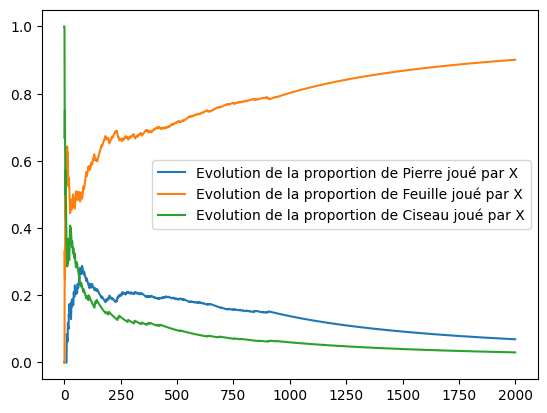

In [34]:
#Evolution des proportions des coups joués par X
def plot_evol_X(Historique):
    moves_X = [row[0] for row in Historique]
    moves_X_2 = np.array([correspondances_inv[x] for x in moves_X])


    # On comptabilise les évolutions des fréquences des couos joués par X
    moves_X_resh = np.eye(3)[moves_X_2]
    moves_X_evol = np.cumsum(moves_X_resh, axis=0)
    moves_X_prop_evol = moves_X_evol / (1 + np.arange(n)[:, np.newaxis])

    print(moves_X_prop_evol)

    plt.plot(moves_X_prop_evol[:, 0], label="Evolution de la proportion de Pierre joué par X")  
    plt.plot(moves_X_prop_evol[:, 1], label="Evolution de la proportion de Feuille joué par X")
    plt.plot(moves_X_prop_evol[:, 2], label="Evolution de la proportion de Ciseau joué par X")

    plt.legend()

plot_evol_X(Historique)

In [35]:
# Comparaison avec la meilleure réponse théorique

print(f"Meilleure réponse de X s'il connaissait la distribution de probabilité {p_Y} de Y\n\t{ReponseStrategie(p_Y[0], p_Y[1], p_Y[2])}")


Meilleure réponse de X s'il connaissait la distribution de probabilité (0.6, 0.2, 0.2) de Y
	(0, 1, 0)


On constate bien comme le montre le graphique que la stratégie de X converge bien vers la meilleure réponse possible (jouer Feuille) face à la distribution de jeu de Y

<a id="Apprend_apprend"></a>
## $X$ apprend / $Y$ apprend

<div markdown=1 class="DoIt"> 

Faire jouer $X$ et $Y$ m'un contre l'autre,  chacun suivant selon l'algorithme d'apprentissage. Tracer l'évolution des proportions des coups joués par $X$.

In [36]:
n = 3000
eps = 0.001
Historique = []

for i in range(n):
    val_X = JouerApprentissage(Historique, eps)
    val_Y = JouerApprentissage(Historique, eps)
    Historique.append([val_X, val_Y])

# On va essayer de voir si avec cette stratégie X va gagner le plus souvent

def winner(val_X, val_Y):
    "Retourne -1 en cas de match nul, 0 si X gagne, 1 sinon"
    if val_X == val_Y:
        return -1
    match val_X:
        case "Pi":
            return val_Y == "Fe"
        case "Fe":
            return val_Y == "Ci"
        case "Ci":
            return val_Y == "Pi"
        
def game_stats(Historique):
    "Retourne les stats de victoire du jeu"
    results = [winner(vals[0], vals[1]) for vals in Historique]
    shifted = np.array(results) + 1
    counts = np.bincount(shifted)
    return {i-1: count for i, count in enumerate(counts)}

stats = game_stats(Historique)
print(f"Statistiques du jeu à {n} parties")
print(f"\tNbre de nuls :", stats[-1])
print(f"\tNbre de victoire de X :", stats[0])
print(f"\tNbre de victoires de Y:", stats[1])

Statistiques du jeu à 3000 parties
	Nbre de nuls : 2888
	Nbre de victoire de X : 58
	Nbre de victoires de Y: 54


Dans ce nouveau cas, les parties se soldent quasiment que par des nuls ; aucun joueur ne semble prévisible!

[[1.         0.         0.        ]
 [0.5        0.5        0.        ]
 [0.33333333 0.33333333 0.33333333]
 ...
 [0.34089393 0.33655771 0.32254837]
 [0.34078026 0.33644548 0.32277426]
 [0.34066667 0.33666667 0.32266667]]


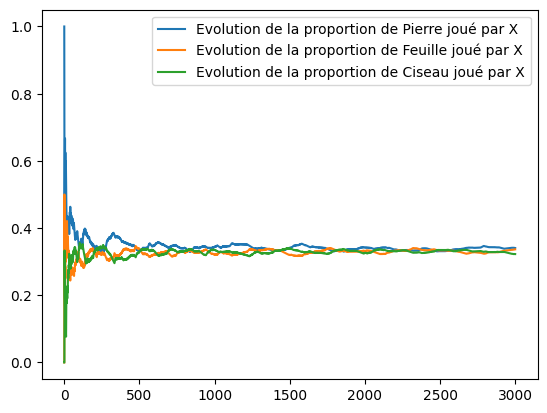

In [37]:
#Evolution des proportions des coups joués par X
def plot_evol_X(Historique):
    moves_X = [row[0] for row in Historique]
    moves_X_2 = np.array([correspondances_inv[x] for x in moves_X])


    # On comptabilise les évolutions des fréquences des couos joués par X
    moves_X_resh = np.eye(3)[moves_X_2]
    moves_X_evol = np.cumsum(moves_X_resh, axis=0)
    moves_X_prop_evol = moves_X_evol / (1 + np.arange(n)[:, np.newaxis])

    print(moves_X_prop_evol)

    plt.plot(moves_X_prop_evol[:, 0], label="Evolution de la proportion de Pierre joué par X")  
    plt.plot(moves_X_prop_evol[:, 1], label="Evolution de la proportion de Feuille joué par X")
    plt.plot(moves_X_prop_evol[:, 2], label="Evolution de la proportion de Ciseau joué par X")

    plt.legend()

plot_evol_X(Historique)

X se retrouve à jouer uniformément sur le long terme. Comme quoi quand les 2 jouent suivant l'algorithme d'apprentissage, ils deviennent imprévisibles l'un pour l'autre